# Tools 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Load the Dataset

In [2]:
df = pd.read_csv("heart_diseases_final.csv")  

# Feaatures & target
X = df.drop(columns=['target'])
y = df['target']

# Unsupervised Learning - Clustering
Steps:
1. Apply K-Means Clustering (elbow method to determine K).
2. Perform Hierarchical Clustering (dendrogram analysis).
3. Compare clusters with actual disease labels.

**(1) K-Means Clustering**

* Determine Optimal K by using Elbow Method

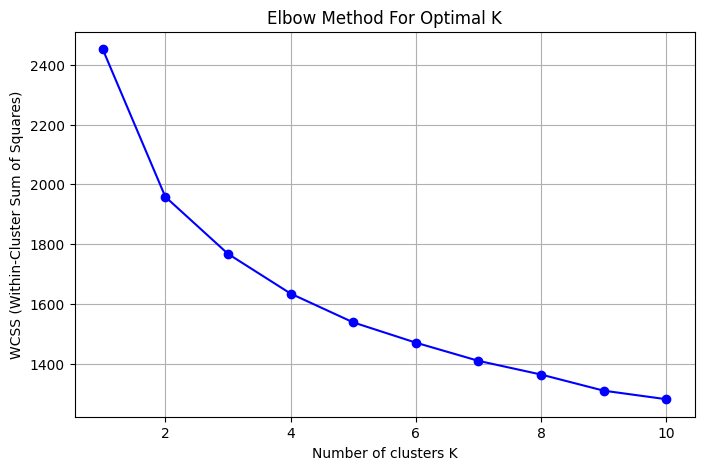

In [3]:
# Determine optimal K using Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method For Optimal K")
plt.grid()
plt.show()

* Apply K-means Clustering & Evaluate the model

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       164
           1       0.79      0.70      0.74       139

    accuracy                           0.78       303
   macro avg       0.78      0.77      0.77       303
weighted avg       0.78      0.78      0.77       303


Silhouette Score: 0.20216847731817397
Adjusted Rand Index: 0.30138742506320254

Confusion Matrix:


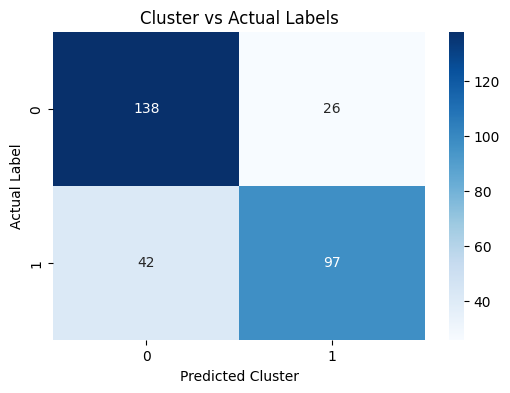

In [4]:
# Apply K-Means with chosen optimal K 
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Map each cluster to the majority actual label
cluster_to_label = {}
for cluster_id in np.unique(clusters):
    # Get the actual labels of samples in this cluster
    labels_in_cluster = y[clusters == cluster_id]
    # Assign the most common label to this cluster
    majority_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_to_label[cluster_id] = majority_label
# Create a mapped cluster series
mapped_clusters = pd.Series(clusters).map(cluster_to_label)

# Evaluate the model & compare the clusters with actual labels
cm = confusion_matrix(y, mapped_clusters)
print("Classification Report:")
print(classification_report(y, mapped_clusters))

sil_score = silhouette_score(X, clusters)
print("\nSilhouette Score:", sil_score)

ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

# Visualize Confusion Matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Label")
plt.title("Cluster vs Actual Labels")
plt.show()

* Visualize **K-Means** clusters (2D using first two principal components)

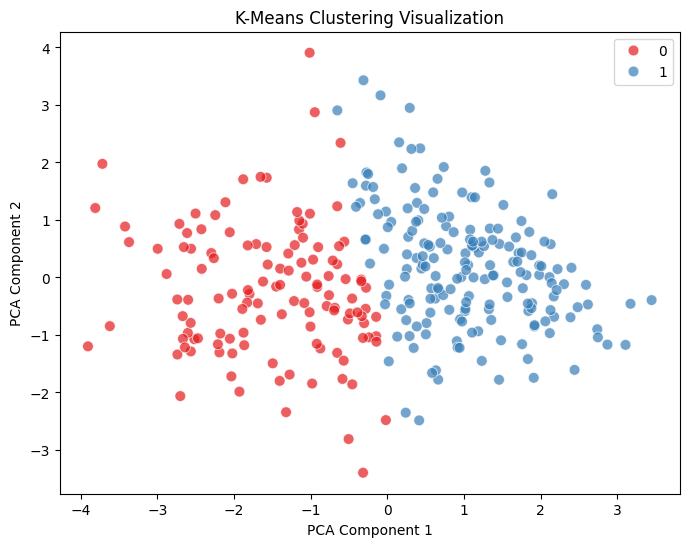

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", s=60, alpha=0.7)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

* Compare Clusters with Actual Labels

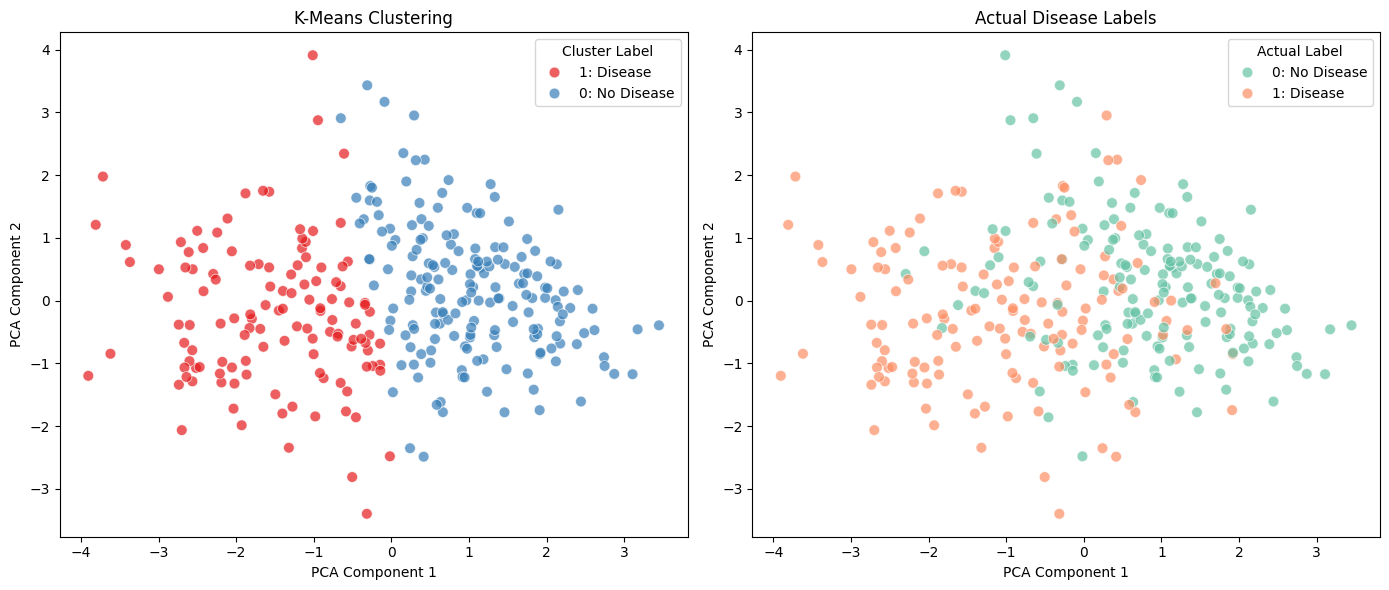

In [6]:
# Map actual labels to strings
label_mapping = {0: "0: No Disease", 1: "1: Disease"}
y_named = y.map(label_mapping)

# Map clusters to majority actual label in each cluster
cluster_labels = {}
for cluster_id in set(clusters):
    # Find majority actual label in this cluster
    majority_label = y_named[clusters == cluster_id].mode()[0]
    cluster_labels[cluster_id] = majority_label
# Create a Series with meaningful cluster names
cluster_named = pd.Series(clusters).map(cluster_labels)

plt.figure(figsize=(14,6))

# Plot 1: K-Means Clusters with meaningful legend
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_named, palette="Set1", s=60, alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")

# Plot 2: Actual Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_named, palette="Set2", s=60, alpha=0.7)
plt.title("Actual Disease Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Actual Label")

plt.tight_layout()
plt.show()

**(2) Hierarchical Clustering**

* Use Dendogram Analysis

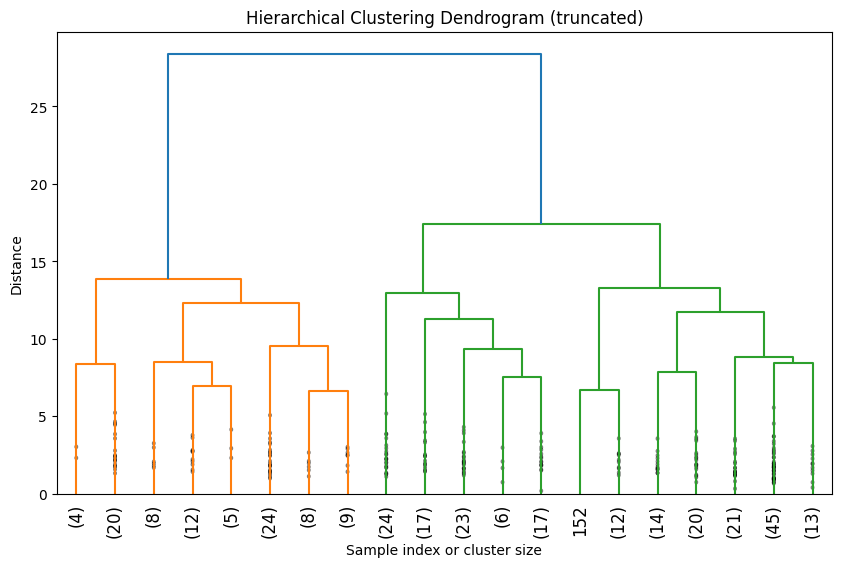

In [7]:
# Compute the linkage matrix (Ward method)
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.show()

* Perform Hierarchical Clustering & Evaluate the model

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       164
           1       0.86      0.55      0.67       139

    accuracy                           0.75       303
   macro avg       0.78      0.74      0.74       303
weighted avg       0.78      0.75      0.74       303


Silhouette Score: 0.1862578031777574
Adjusted Rand Index: 0.25208161484462904

Confusion Matrix:


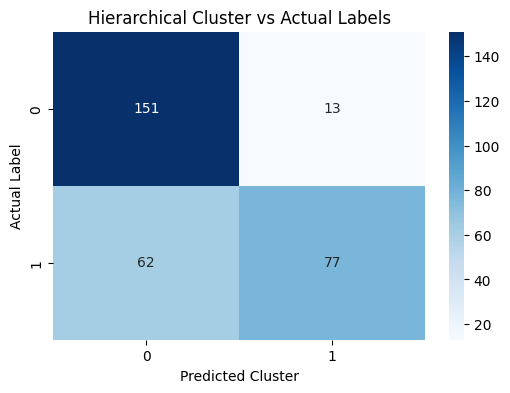

In [8]:
# Form flat clusters
# Choose number of clusters (which is 2 in our case for heart disease classification)
num_clusters = 2
clusters = fcluster(Z, num_clusters, criterion='maxclust') - 1  # make cluster labels 0-based

# Map clusters to majority actual labels
cluster_to_label = {}
for cluster_id in np.unique(clusters):
    labels_in_cluster = y[clusters == cluster_id]
    majority_label = Counter(labels_in_cluster).most_common(1)[0][0]
    cluster_to_label[cluster_id] = majority_label
# Map cluster labels to actual label names
mapped_clusters = pd.Series(clusters).map(cluster_to_label)

# Evaluate Clusters vs Actual Labels
cm = confusion_matrix(y, mapped_clusters)
print("Classification Report:")
print(classification_report(y, mapped_clusters))

sil_score = silhouette_score(X, clusters)
print("\nSilhouette Score:", sil_score)

ari = adjusted_rand_score(y, clusters)
print("Adjusted Rand Index:", ari)

# Visualize Confusion Matrix
print("\nConfusion Matrix:")
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Cluster")
plt.ylabel("Actual Label")
plt.title("Hierarchical Cluster vs Actual Labels")
plt.show()

* Visualize **Hierarchical** clusters (2D using first two principal components)

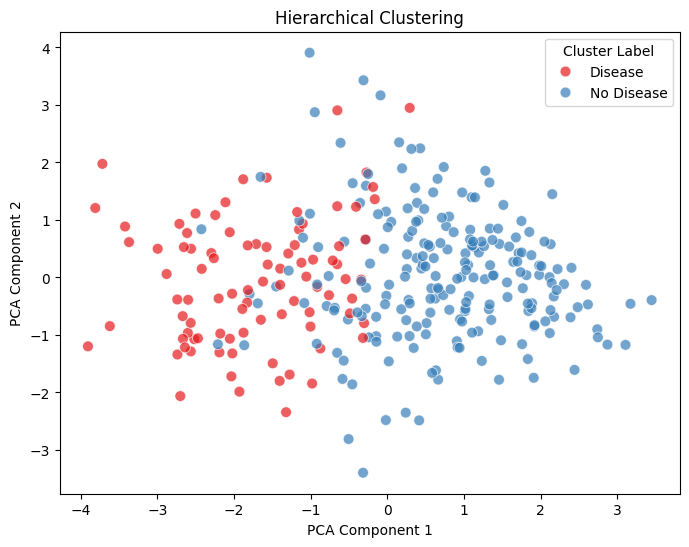

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mapped_clusters.map({0:"No Disease",1:"Disease"}), palette="Set1", s=60, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")

* Compare Clusters with Actual Labels

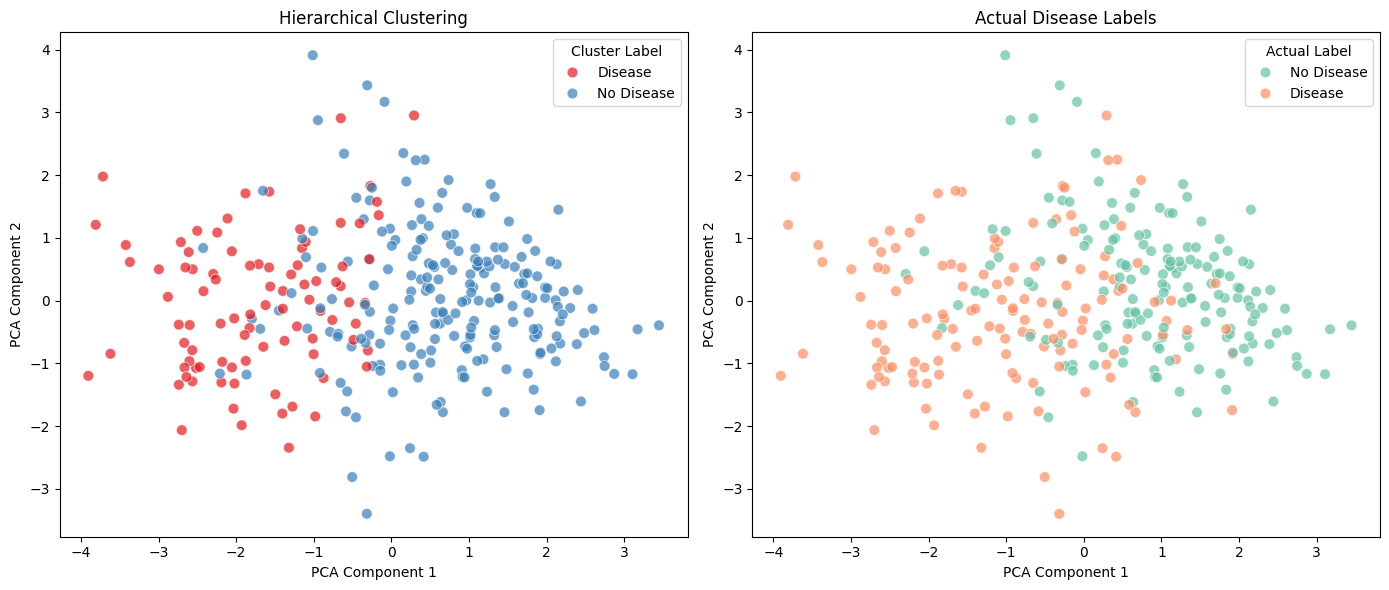

In [10]:
plt.figure(figsize=(14,6))

# Plot 1: Hierarchical Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=mapped_clusters.map({0:"No Disease",1:"Disease"}), palette="Set1", s=60, alpha=0.7)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster Label")

# Plot 2: Actual Labels
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y.map({0:"No Disease",1:"Disease"}), palette="Set2", s=60, alpha=0.7)
plt.title("Actual Disease Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Actual Label")

plt.tight_layout()
plt.show()